# Milan Bansal 
# Roll no.  214102318

# Project

## Implementations -
### Part A. Exploratory Data Analysis (EDA)
### Part B. Applying Different Algorithms
### 1.) K-Nearest Neibours Algorithm (KNN)
### 2.) Decision Tree Classifier
### 3.) Logistic Regression
### 4.) Support Vector Machine (SVM)
### 5.) Random Forest Classifier

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = 'drive/MyDrive/StrokePrediction/'

## Importing libraries

In [2]:
# Importing packages
import numpy as np
from matplotlib import pyplot as plt
import random 
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import os

# Stroke-Dataset

In [6]:
stroke_data = pd.read_csv(path + 'stroke-data.csv') # reading the dataset
stroke_data.sample(15) # getting Sample of the dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3536,15990,Male,65.00,1,0,Yes,Govt_job,Rural,189.88,34.0,never smoked,0
4409,1953,Female,0.72,0,0,No,children,Rural,112.19,20.1,Unknown,0
529,7621,Female,31.00,0,0,Yes,Private,Rural,80.79,28.7,Unknown,0
2865,51963,Male,58.00,0,0,Yes,Private,Urban,69.24,27.6,never smoked,0
3523,52579,Female,51.00,0,0,Yes,Self-employed,Rural,97.25,21.5,never smoked,0
2524,47861,Male,81.00,0,0,Yes,Private,Urban,165.47,28.1,Unknown,0
4068,28734,Female,16.00,0,0,No,Never_worked,Urban,102.10,27.1,never smoked,0
1466,44950,Male,51.00,1,0,Yes,Private,Rural,163.56,NaN,formerly smoked,0
4511,21830,Female,82.00,0,0,Yes,Private,Urban,82.63,17.9,smokes,0
703,27796,Female,66.00,0,0,Yes,Private,Urban,102.07,16.7,smokes,0



## Context:
 <p style = 'text-align : left; color:black; font-size: 15px; font-family: "Arial"'><strong> According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.<br>
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
</strong></p>

## Attribute Information:
<p style = 'text-align : left; color:black; font-size: 18px; font-family: "Aerial"'><strong> 
    
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
</strong></p>


### Cleaning the dataset

In [7]:
stroke_data.drop(['id'], axis = 1, inplace = True) # removing the 'id' column
stroke_data.describe() # description of the dataset

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Handling missing values

In [8]:
stroke_data.isnull().sum() # getting number of missing values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
# We can replace the null values of 'bmi' with median in that column.
stroke_data.bmi.replace(to_replace=np.nan, value=stroke_data.bmi.median(), inplace=True)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>................................................................................................</strong></p>

## Exploratory Data Analysis

In [10]:
df = pd.DataFrame({'Stroke: Yes':[1], 
                    'Stroke: No':[0]}, index = ['Label'])
display(df)

,Stroke: Yes,Stroke: No
Label,1,0


### Plots for class counts

,Stroke: No,Stroke: Yes
Count,249,4861


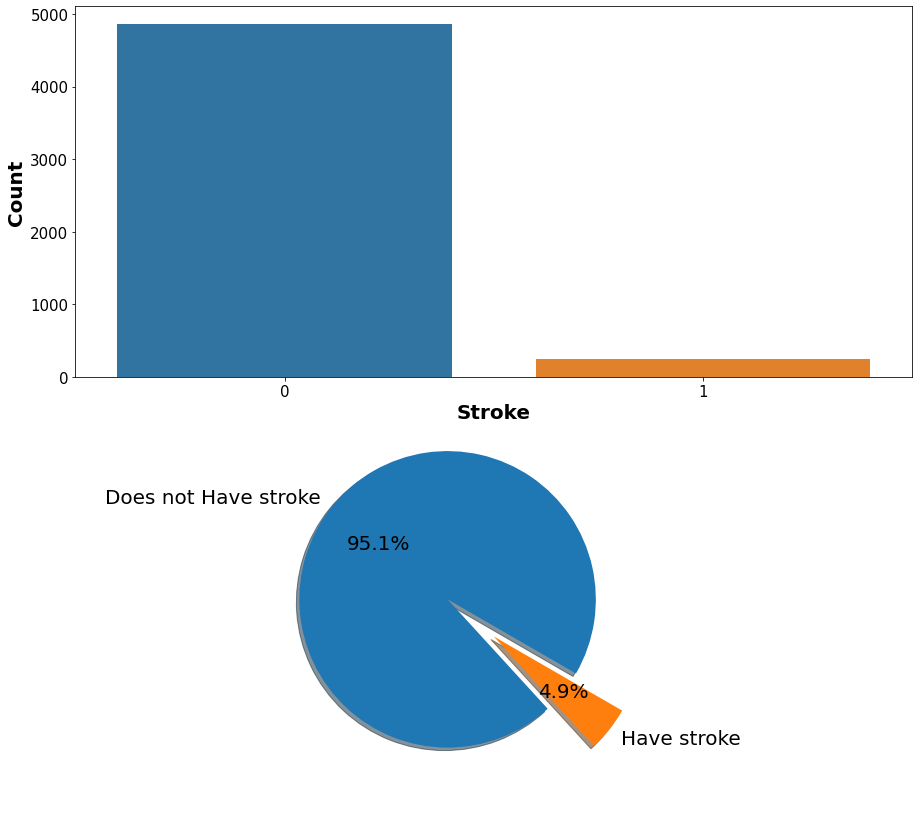

In [11]:
labels = ['Does not Have stroke', 'Have stroke']
counts = [stroke_data['stroke'].value_counts()[0], 
          stroke_data['stroke'].value_counts()[1]]

df_count = pd.DataFrame({'Stroke: No':counts[1],
                    'Stroke: Yes':counts[0]}, index = ['Count'])


fig1 = plt.figure(figsize = (15, 15))
ax1 = fig1.add_subplot(2,1,1)
sns.countplot(data = stroke_data, x = 'stroke')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Stroke', size = 20, weight = 'bold')
plt.ylabel('Count', size = 20, weight = 'bold')

ax2 = fig1.add_subplot(2,1,2)
ax2.pie(counts,explode = [0.4,0], labels = labels, autopct = '%1.1f%%', 
        shadow = True, startangle = -30, textprops = {'fontsize':20})
display(df_count)

#### It can be obsereved that dataset is highly unbalanced

In [12]:
# Separating categorical and Continuous features
cont = ['age', 'avg_glucose_level', 'bmi']
cat = [ 'gender', 'hypertension', 'heart_disease', 'ever_married', 
            'work_type', 'Residence_type', 'smoking_status']

conversions = {'Male':0, 'Female':1, 'Other':2, 
               'No':0, 'Yes':1, 
               'Private':0, 'children': 1, 'Govt_job':2, 'Never_worked':3, 'Self-employed':4,
               'Rural':0, 'Urban':1,
               'smokes':0, 'Unknown':1, 'never smoked':2, 'formerly smoked':3}


stroke_data.replace(conversions, inplace = True)
strokedf = stroke_data.copy()

### Histograms for continous variables

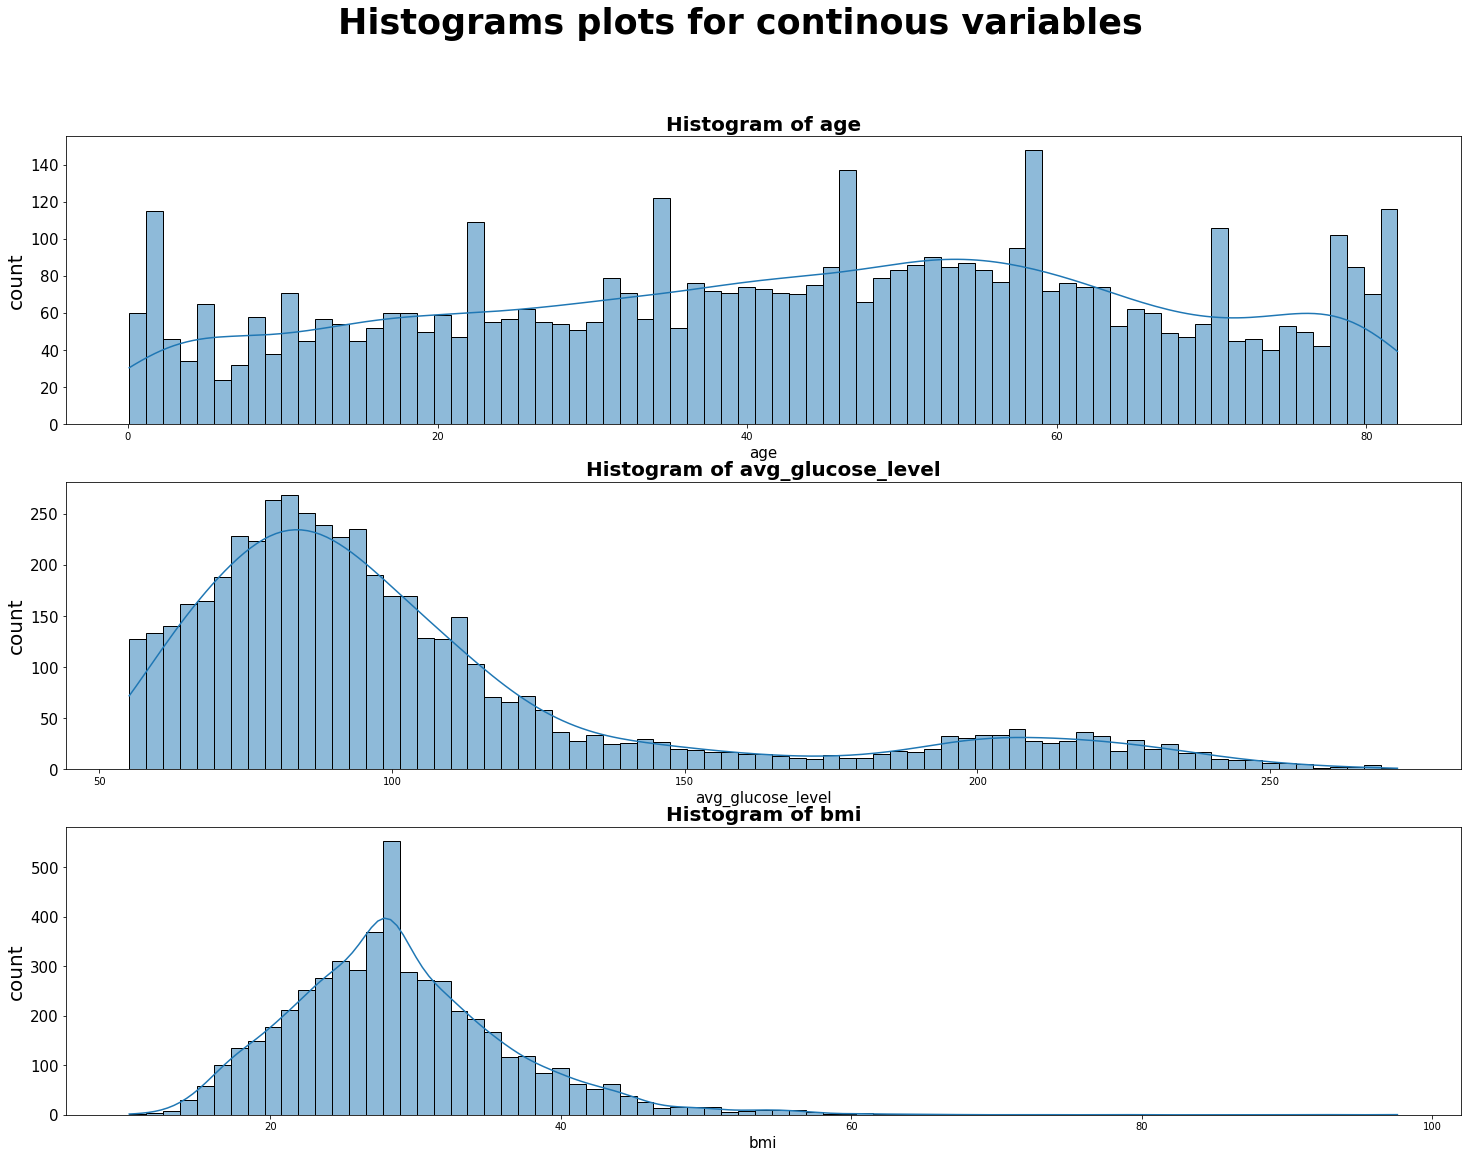

In [13]:
fig5 = plt.figure(figsize = (25,18))
fig5.suptitle('Histograms plots for continous variables', size = 35, weight = 'bold')

for i in range(len(cont)):
    fig5.add_subplot(len(cont), 1, i+1)
    plt.title(f'Histogram of {cont[i]}', weight = 'bold',size = 20)
    plt.xlabel(cont[i], size = 15)
    plt.ylabel('count', size = 20)
    plt.yticks(size = 15)
    sns.histplot(strokedf[cont[i]], bins = 75, kde = 50)


### Kernel Density Estimate plots for continous variables

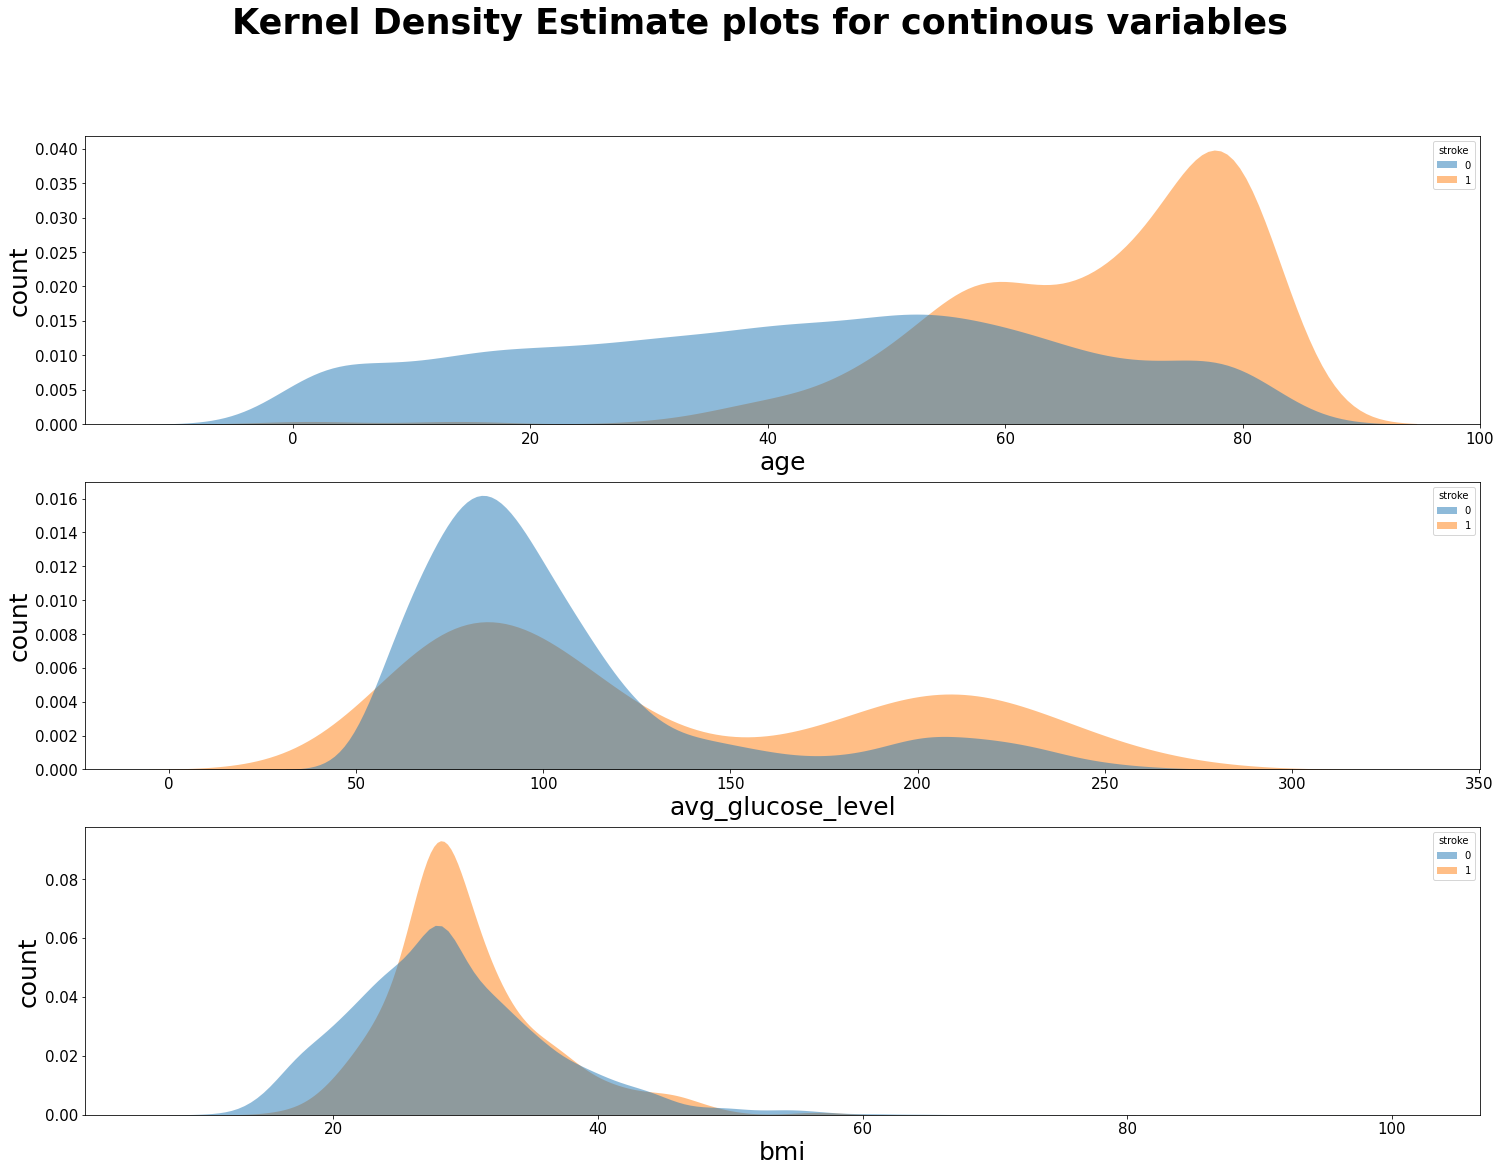

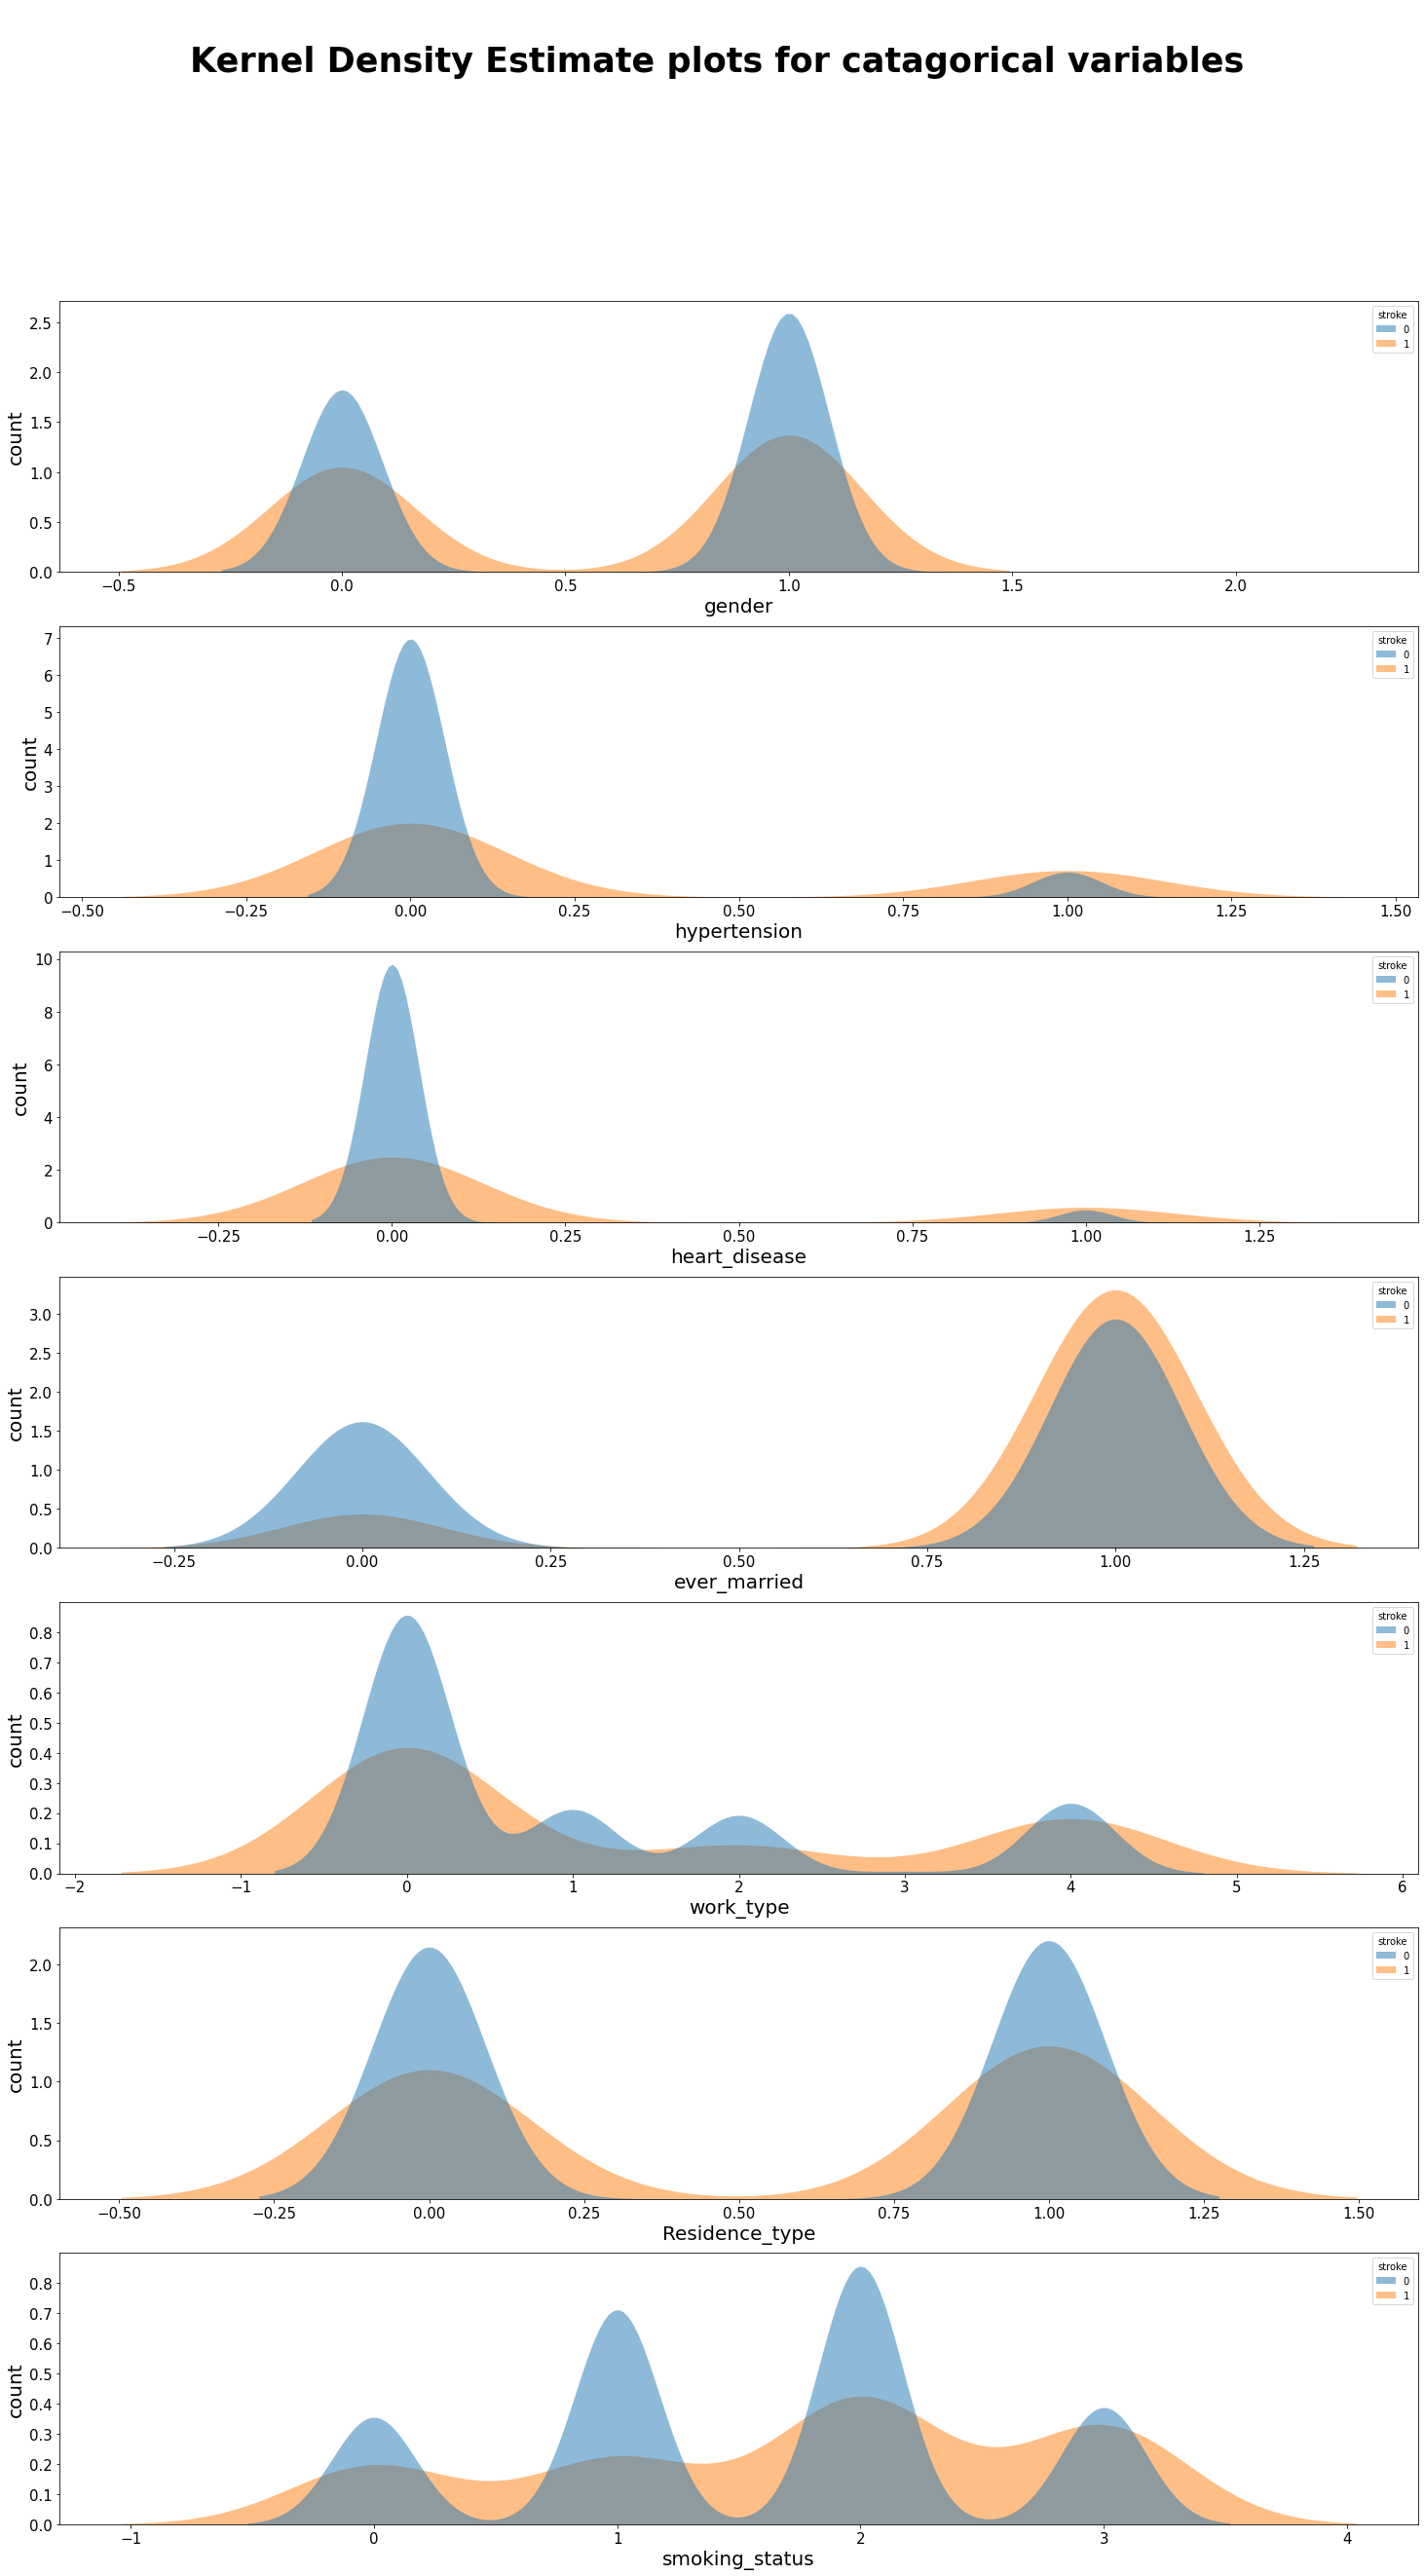

In [14]:
fig3 = plt.figure(figsize = (25,18))
fig3.suptitle('Kernel Density Estimate plots for continous variables', size = 35, weight = 'bold')
for i in range(len(cont)):
    fig3.add_subplot(len(cont),1,i+1)
    plt.xlabel(cont[i] ,size = 25)
    plt.ylabel('count',size = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    sns.kdeplot(data = strokedf, x = cont[i], hue = 'stroke', fill=True, common_norm=False, alpha=.5, linewidth=0)

fig4 = plt.figure(figsize = (25,42))
fig4.suptitle('\nKernel Density Estimate plots for catagorical variables', size = 35, weight = 'bold')

for j in range(len(cat)) :
    fig4.add_subplot(len(cat),1, j+1)
    plt.xlabel(cat[j], size = 20)
    plt.ylabel('count', size = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    sns.kdeplot(data = strokedf, x = cat[j], hue = 'stroke', fill=True, common_norm=False, alpha=.5, linewidth=0)

### Bar plots for Catagorical data

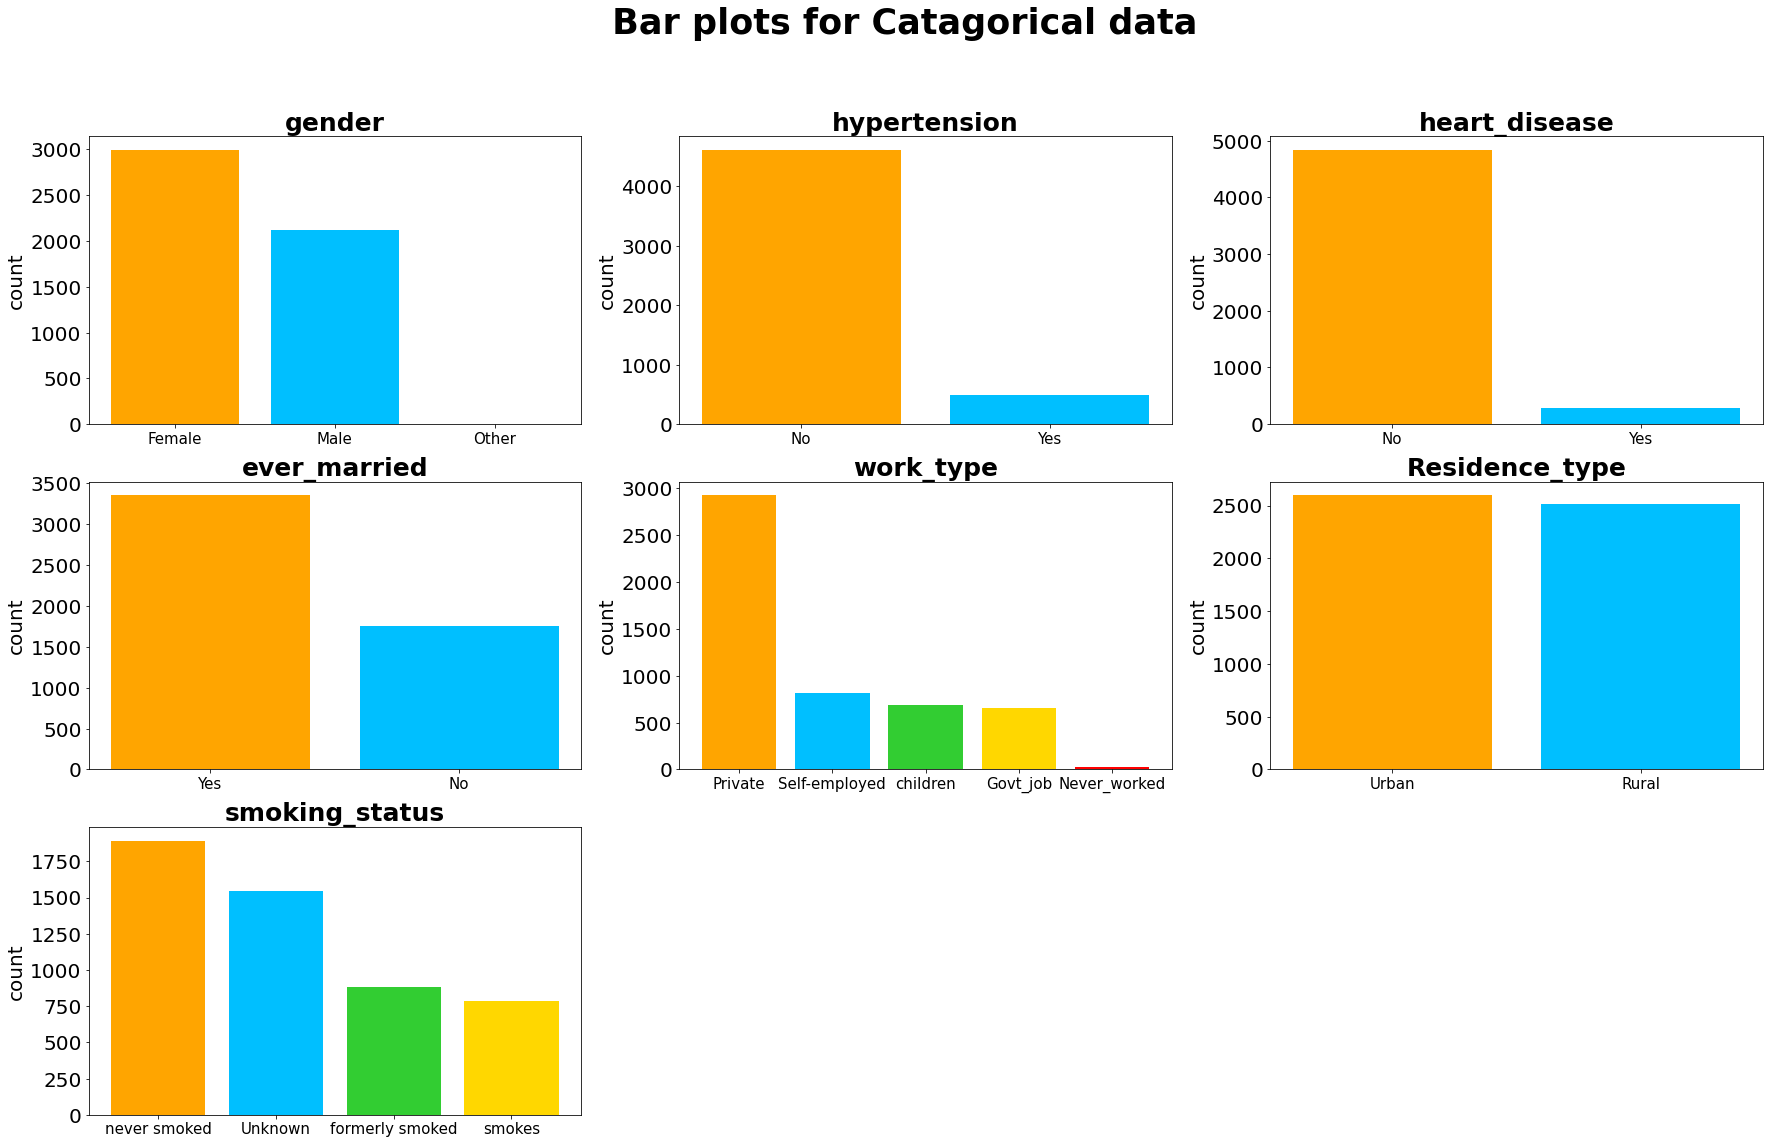

In [15]:
# X labels for plots
xlabs = {'gender': ['Male', 'Female', 'Other'],
          'hypertension':['No', 'Yes'],
         'heart_disease':['No', 'Yes'],
         'ever_married': ['No', 'Yes'],
         'work_type': ['Private', 'children', 'Govt_job', 'Never_worked', 'Self-employed' ],
         'Residence_type':['Rural','Urban'],
         'smoking_status':['smokes', 'Unknown', 'never smoked', 'formerly smoked']}

# Plotting the bar charts for catagorical data
fig2 = plt.figure(figsize=(30,18))
fig2.suptitle(' Bar plots for Catagorical data', size = 35, weight = 'bold')
for i in range(len(cat)):
    x_names = [xlabs[cat[i]][x] for x in strokedf[cat[i]].value_counts().index]
    y = strokedf[cat[i]].value_counts().values
    fig2.add_subplot(3,3,i+1)
    plt.title(cat[i],weight = 'bold',size = 25)
    plt.ylabel('count', size = 20)
    plt.bar(x_names, y, color = ['orange','deepskyblue','limegreen','gold','red'] )
    plt.xticks(size = 15)
    plt.yticks(size = 20)

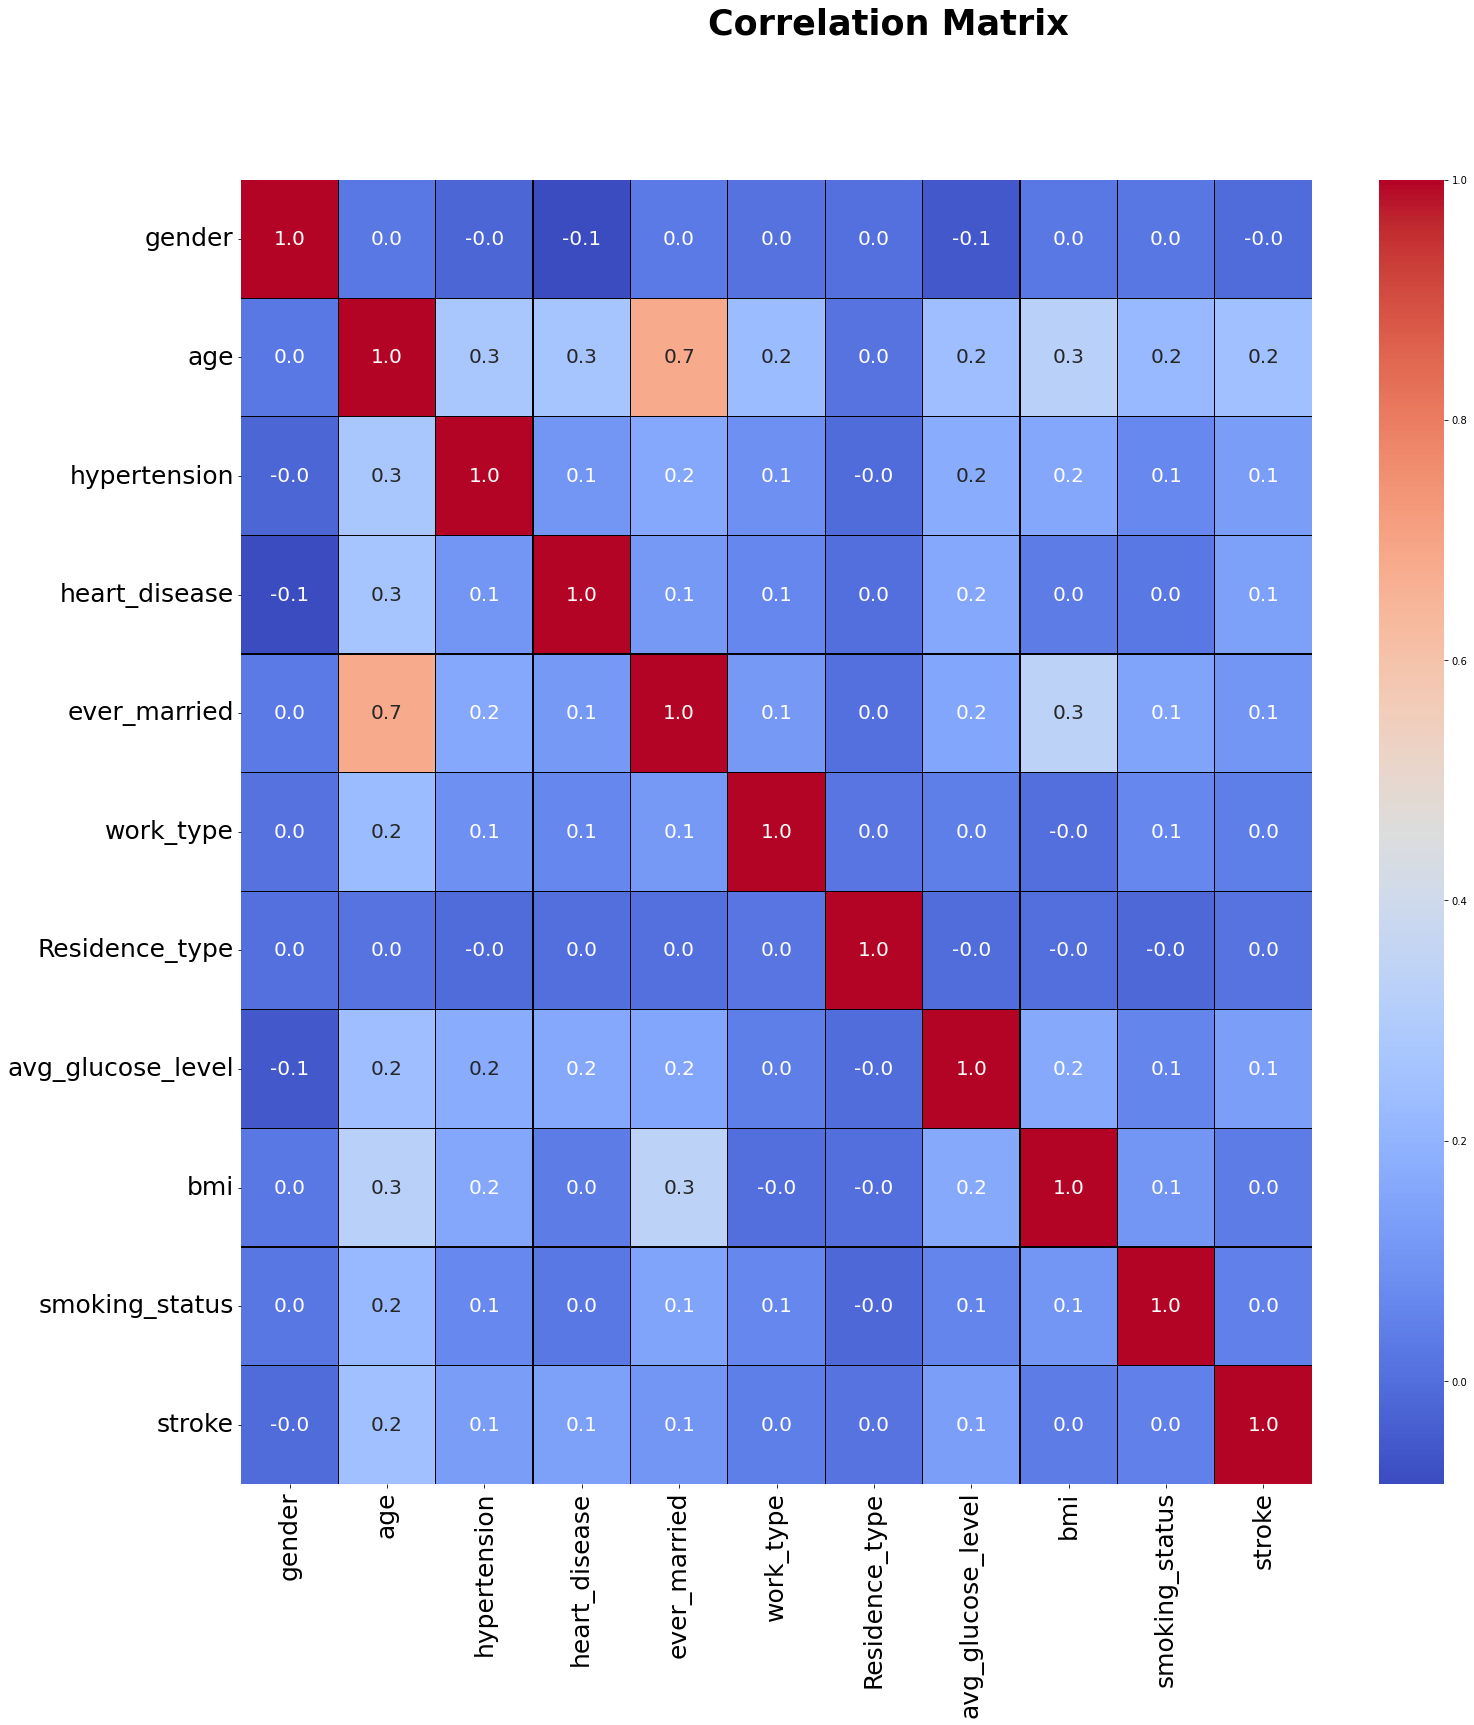

In [16]:
fig6 = plt.figure(figsize = (24, 24))
fig6.suptitle('Correlation Matrix', size=35, weight = 'bold')

sns.heatmap(strokedf.corr(), cmap = "coolwarm",annot = True, fmt='.1f',
            linewidths=0.2, linecolor = 'black',annot_kws={"size":20}, );

plt.yticks(rotation=0, size=25)
plt.xticks(rotation=90,size=25)
plt.show()


### From above correleation matrix, we can say that the variable are loosely correlated with each other.

### PAIRPLOT

PAIRPLOT


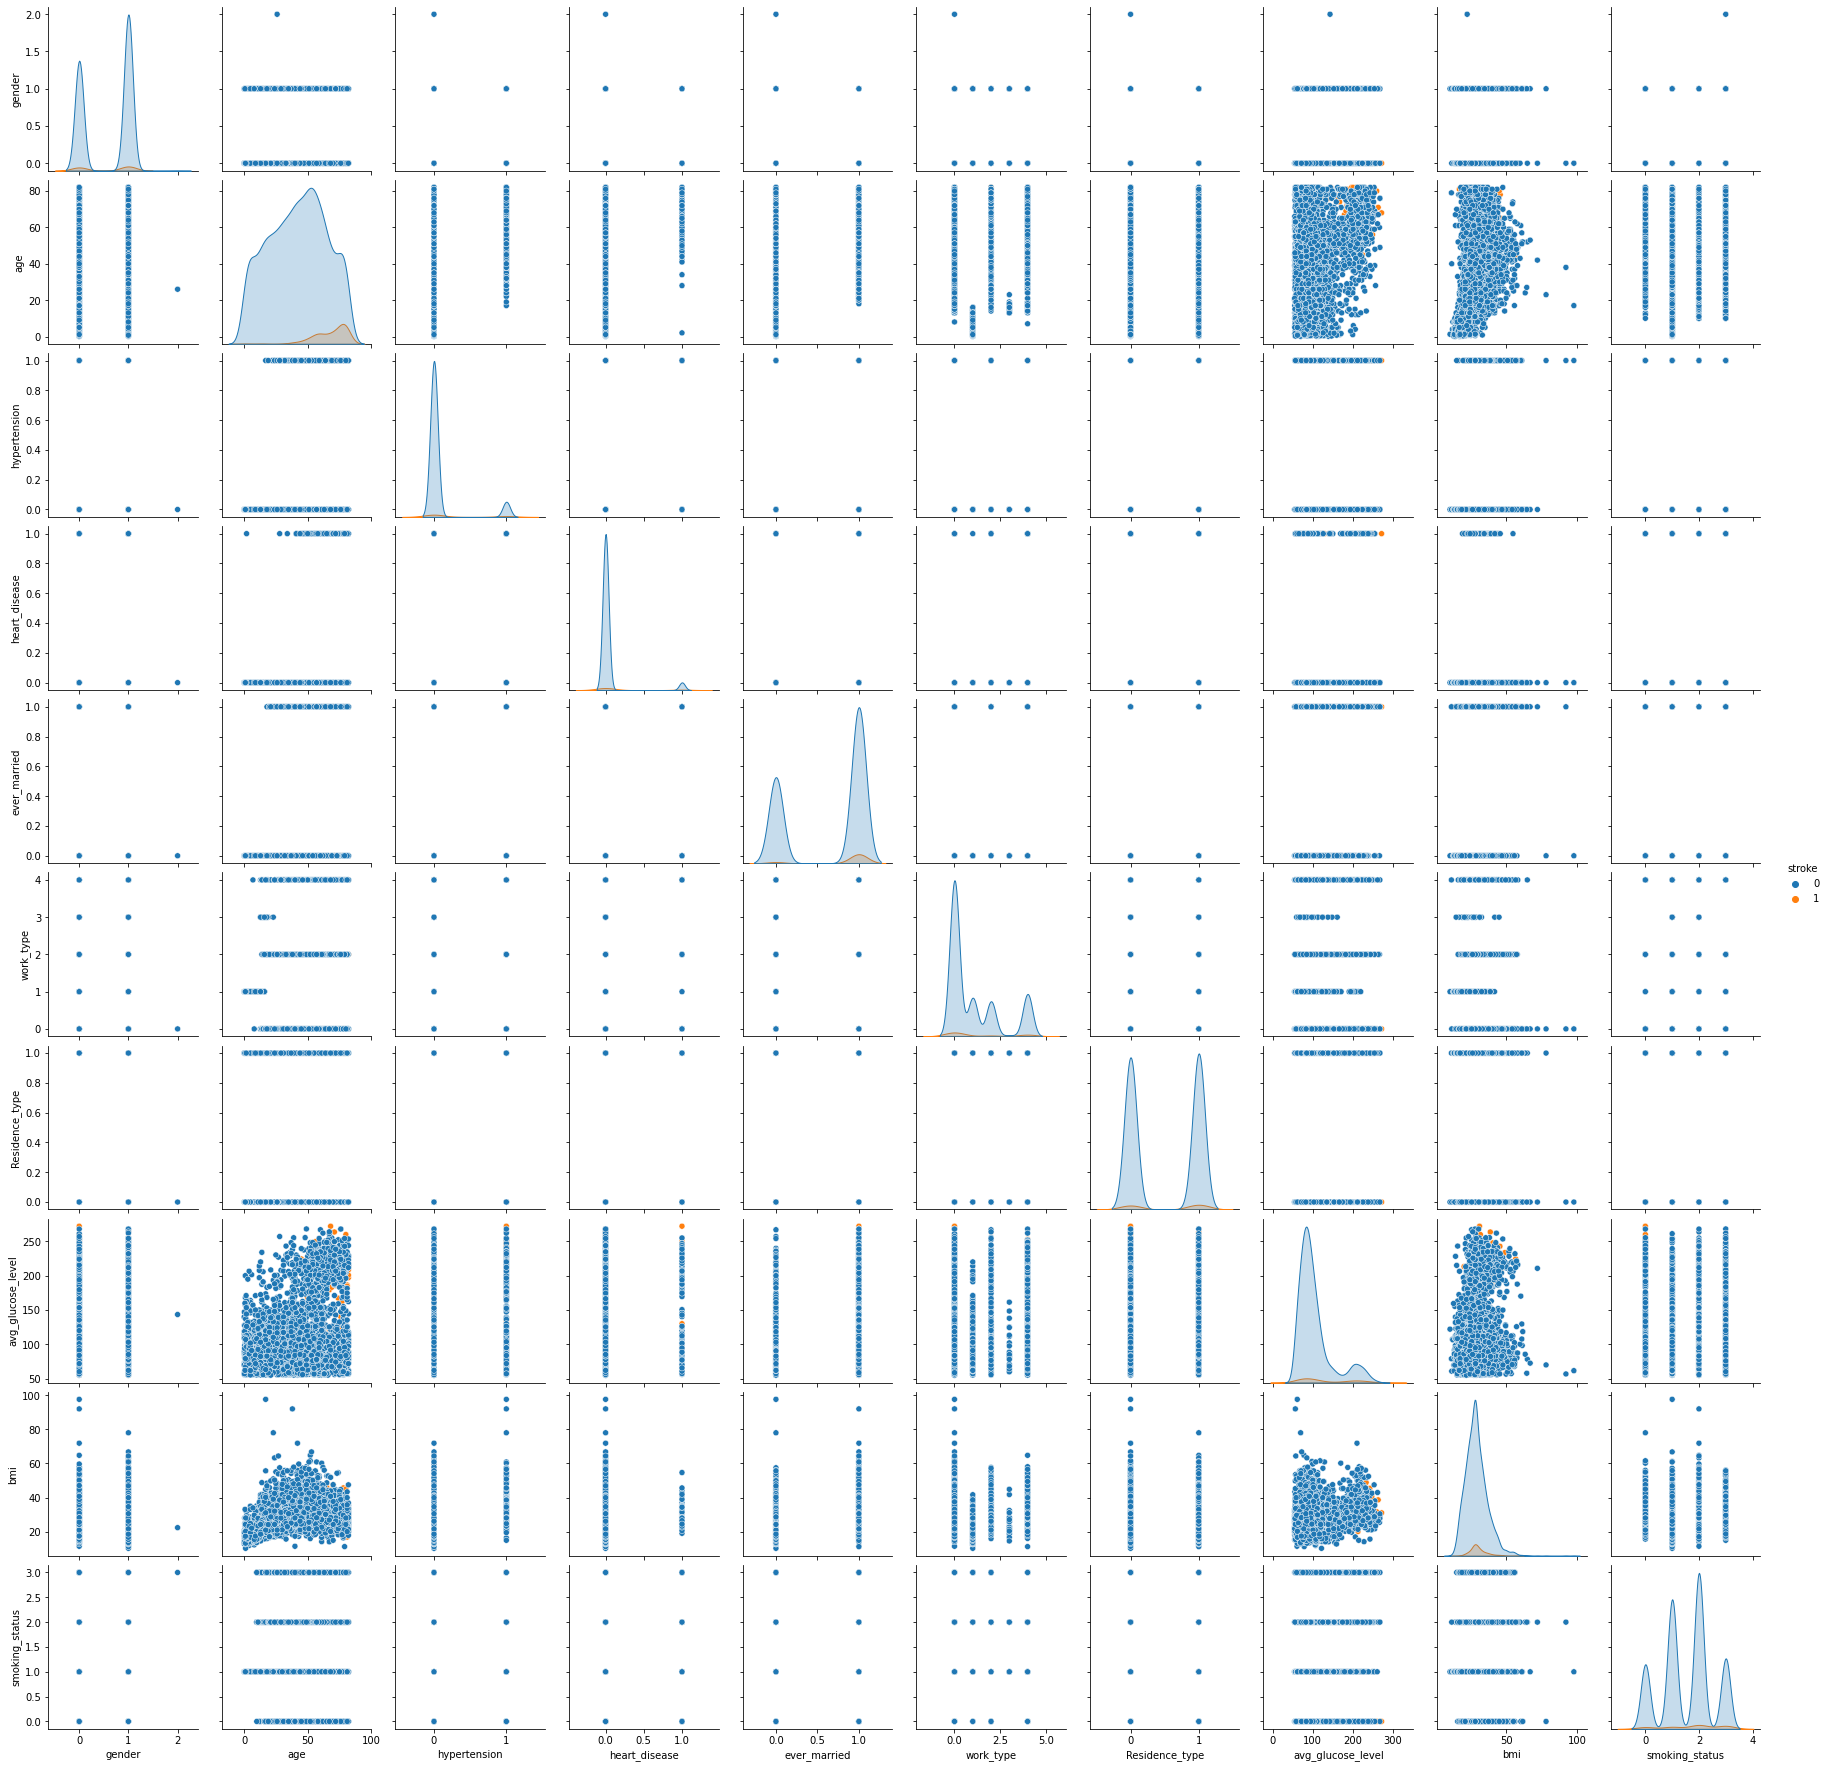

In [17]:
print('PAIRPLOT')
sns.pairplot(strokedf,vars=strokedf.columns[:-1], hue='stroke')
plt.show()

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>................................................................................................</strong></p>

## Data Preprocessing

In [18]:
strokedf.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [19]:
# Encoding categorical Variables
strokedf = pd.get_dummies(strokedf, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [20]:
# separating X and y
X = strokedf.drop(['stroke'], axis=1)
y = strokedf['stroke']

#### Splitting the dataset into train and test set

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

### Resampling the dataset using SMOTE

In [ ]:
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [55]:
print("Before resampling")
y_train.value_counts()

Before resampling


0    3901
1     187
Name: stroke, dtype: int64

In [56]:
print("After resampling")
y_train_sm.value_counts()

After resampling


0    3901
1    3901
Name: stroke, dtype: int64

In [25]:
# A function to calculate scores and confusion matrix.

def scores( y_test, y_preds):
    accuracy = round(accuracy_score(y_test, y_preds) * 100,3) 
    recall = round(recall_score(y_test, y_preds) * 100,3)
    precision = round(precision_score(y_test, y_preds) * 100,3) 
    f1 = round(f1_score(y_test, y_preds) * 100,3) 
    cm = confusion_matrix(y_test, y_preds)
    cmdf = pd.DataFrame(cm, columns = ['Stroke:No-P', 'Stroke:Yes-P' ], 
                      index = ['Stroke:No-A', 'Stroke:Yes-A' ] )
    
    
    score_set = [accuracy,recall,precision,f1]

    print(f'accuracy: {accuracy} %')
    print(f'recall: {recall} %')
    print(f'precision: {precision} %')
    print(f'f1: {f1} %\n')
    print('--'*40,f'\nClassification Report:\n{classification_report(y_test, y_preds)}\n' + '--' * 40)
    
    sns.heatmap(cmdf,annot = True, annot_kws = {'fontsize':15}, fmt = 'g',cmap = 'Blues')
    plt.suptitle('Confusion Matrix', size = 15)  
    plt.show()
#     plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
#     plt.show()
    return score_set

# Applying ML algorithms

# 1.) Classification using KNN Algorithm

In [26]:
from sklearn.neighbors import KNeighborsClassifier

accuracy: 80.039 %
recall: 54.839 %
precision: 16.19 %
f1: 25.0 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.88       960
           1       0.16      0.55      0.25        62

    accuracy                           0.80      1022
   macro avg       0.56      0.68      0.57      1022
weighted avg       0.92      0.80      0.85      1022

--------------------------------------------------------------------------------


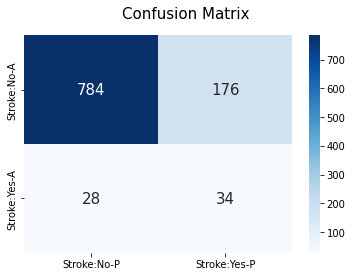

In [29]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train_sm, y_train_sm)
preds_knn = model_knn.predict(X_test)
KNN_score = scores(y_test, preds_knn)

##### Here we have choose K = 5 as the optimum value bacuase as we increase the value of K, the recall values increase but accuracy decreases. For prediction in medical field, the high recall values is important but without compromising accuracy. Therefore K = 5 gives decent result.

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# 2.) Classification using Decision Tree Classifier

accuracy: 86.301 %
recall: 17.742 %
precision: 11.0 %
f1: 13.58 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       960
           1       0.11      0.18      0.14        62

    accuracy                           0.86      1022
   macro avg       0.53      0.54      0.53      1022
weighted avg       0.89      0.86      0.88      1022

--------------------------------------------------------------------------------


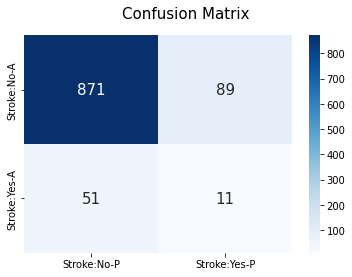

In [30]:
model_dct = DecisionTreeClassifier()
model_dct.fit(X_train_sm, y_train_sm)
dct_preds = model_dct.predict(X_test)
dct_score = scores(y_test,dct_preds)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# 3.) Classification using Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

accuracy: 83.757 %
recall: 27.419 %
precision: 12.319 %
f1: 17.0 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       960
           1       0.12      0.27      0.17        62

    accuracy                           0.84      1022
   macro avg       0.54      0.57      0.54      1022
weighted avg       0.90      0.84      0.87      1022

--------------------------------------------------------------------------------


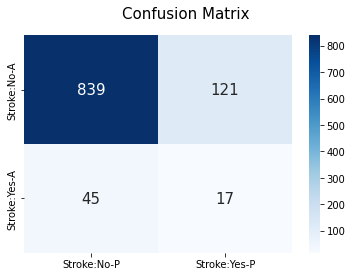

In [40]:
model_logreg = LogisticRegression(random_state = 3, max_iter = 100000,)
model_logreg.fit(X_train_sm, y_train_sm)
logreg_preds = model_logreg.predict(X_test)
logreg_scores = scores(y_test,logreg_preds)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# 4.) Classification using SVM Classifier

accuracy: 72.994 %
recall: 75.806 %
precision: 15.26 %
f1: 25.405 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.15      0.76      0.25        62

    accuracy                           0.73      1022
   macro avg       0.57      0.74      0.54      1022
weighted avg       0.93      0.73      0.80      1022

--------------------------------------------------------------------------------


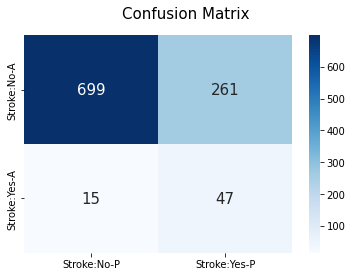

In [47]:
model_svc = SVC(C = 0.25, kernel = "rbf")
model_svc.fit(X_train_sm, y_train_sm)
svm_preds = model_svc.predict(X_test)
svc_score = scores(y_test,svm_preds)

# 5.) Classification using Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

accuracy: 90.509 %
recall: 14.516 %
precision: 16.981 %
f1: 15.652 %

-------------------------------------------------------------------------------- 
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       960
           1       0.17      0.15      0.16        62

    accuracy                           0.91      1022
   macro avg       0.56      0.55      0.55      1022
weighted avg       0.90      0.91      0.90      1022

--------------------------------------------------------------------------------


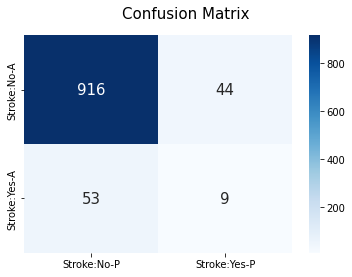

In [38]:
model_randForest = RandomForestClassifier(n_estimators=100, criterion='gini')
model_randForest.fit(X_train_sm, y_train_sm)
randForest_preds = model_randForest.predict(X_test)
randForest_scores = scores(y_test,randForest_preds)

 <p style = 'text-align : center; color:black; font-size: 30px; font-family: "times new roman"'><strong>...............................................................................................................</strong></p>

# Comparison 

In [50]:
score_names = ['accuracy','recall','precision','f1 score']
all_score = [KNN_score , dct_score, logreg_scores, svc_score, randForest_scores]
score_df = pd.DataFrame(all_score, columns = score_names,
                       index = ['KNN','DecisionTree','Logistic Regression','SVM', 'RandomForest'])
score_df.style.highlight_max(color = 'green', axis = 0)

# display(score_df)

,accuracy,recall,precision,f1 score
KNN,80.039000,54.839000,16.190000,25.000000
DecisionTree,86.301000,17.742000,11.000000,13.580000
Logistic Regression,83.757000,27.419000,12.319000,17.000000
SVM,72.994000,75.806000,15.260000,25.405000
RandomForest,90.509000,14.516000,16.981000,15.652000


#### From the above table it can been be observed that random forest classifier has the highest accuracy. But in case of medical disease prediction, accuracy does not play major role. For this task recall value should be high, i.e. if a person has disease, model should be able to predict it correctly. SVM Classifier works the best in this regard with a recall value of 75%.